<a href="https://colab.research.google.com/github/rana28l/GameMLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# [1] Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from google.colab import files
import os

# [2] Upload CSV file
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())

# [3] Handle missing values
print("Missing values per column:")
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# [4] Create target class based on behavior
def classify_player(row):
    if row['PlayTimeHours'] >= 40 or row['SessionsPerWeek'] >= 15 or row['AchievementsUnlocked'] >= 100:
        return 'Pro'
    elif (10 <= row['PlayTimeHours'] < 40) or (5 <= row['SessionsPerWeek'] < 15) or (30 <= row['AchievementsUnlocked'] < 100):
        return 'Intermediate'
    else:
        return 'Beginner'

df['PlayerCategory'] = df.apply(classify_player, axis=1)

# [5] Encode categorical features
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# [6] Encode target class
label_encoder = LabelEncoder()
df['PlayerCategory'] = label_encoder.fit_transform(df['PlayerCategory'])

# [7] Prepare feature matrix and targets
X = df[['Age', 'Gender', 'Location', 'InGamePurchases', 'GameDifficulty', 'GameGenre',
        'PlayTimeHours', 'SessionsPerWeek', 'PlayerLevel', 'AchievementsUnlocked', 'AvgSessionDurationMinutes']]

y_labels = df['PlayerCategory']                    # for traditional models
y_onehot = to_categorical(y_labels, num_classes=3) # for ANN model

# [8] Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# [9] Split data into train/test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_labels, test_size=0.2, random_state=42)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# [10] Create directories
os.makedirs("Data/TrainTest", exist_ok=True)
os.makedirs("Data/Result", exist_ok=True)

# [11] Save processed data
pd.DataFrame(X_train_clf).to_csv("Data/TrainTest/train_features.csv", index=False)
pd.DataFrame(X_test_clf).to_csv("Data/TrainTest/test_features.csv", index=False)
pd.DataFrame(y_train_clf).to_csv("Data/TrainTest/train_target.csv", index=False)
pd.DataFrame(y_test_clf).to_csv("Data/TrainTest/test_target.csv", index=False)
pd.DataFrame(y_test_clf, columns=["true_label"]).to_csv("Data/Result/true_test_labels.csv",index=False)



Saving online_gaming_behavior_dataset.csv to online_gaming_behavior_dataset (1).csv
   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                       

<ipython-input-20-259d0dd3d369>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
# Train and evaluate Linear Regression separately
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train_clf, y_train_clf)
y_pred = lr_model.predict(X_test_clf)

mse = mean_squared_error(y_test_clf, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_clf, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


Linear Regression - MSE: 0.11, RMSE: 0.33, R2 Score: 0.62


Decision Tree - Accuracy: 0.9998751092793805 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00      5490
           2       1.00      1.00      1.00      1990

    accuracy                           1.00      8007
   macro avg       1.00      1.00      1.00      8007
weighted avg       1.00      1.00      1.00      8007



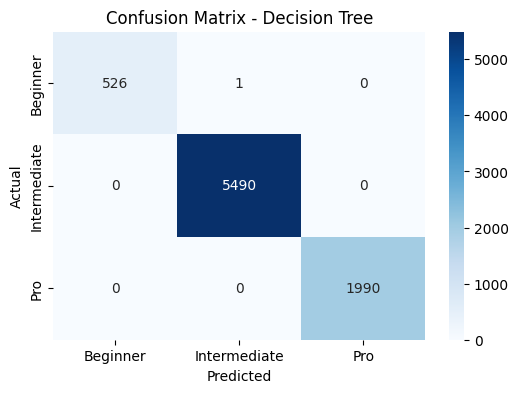

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred = dt_model.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Decision Tree - Accuracy: {accuracy} \n")
print(report)

accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred, output_dict=True)

model_accuracies['Decision Tree'] = accuracy
model_reports['Decision Tree'] = report


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/dt_results.csv",index=False)


Random Forest - Accuracy: 0.9998751092793805 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00      5490
           2       1.00      1.00      1.00      1990

    accuracy                           1.00      8007
   macro avg       1.00      1.00      1.00      8007
weighted avg       1.00      1.00      1.00      8007



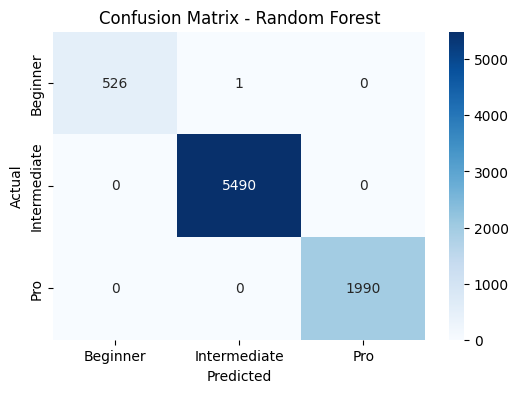

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred = rf_model.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Random Forest - Accuracy: {accuracy} \n")
print(report)

accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred, output_dict=True)

model_accuracies['Random Forest'] = accuracy
model_reports['Random Forest'] = report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/rf_results.csv",index=False)


KNN - Accuracy: 0.8952166854002748 

              precision    recall  f1-score   support

           0       0.83      0.57      0.67       527
           1       0.90      0.95      0.93      5490
           2       0.89      0.82      0.86      1990

    accuracy                           0.90      8007
   macro avg       0.87      0.78      0.82      8007
weighted avg       0.89      0.90      0.89      8007



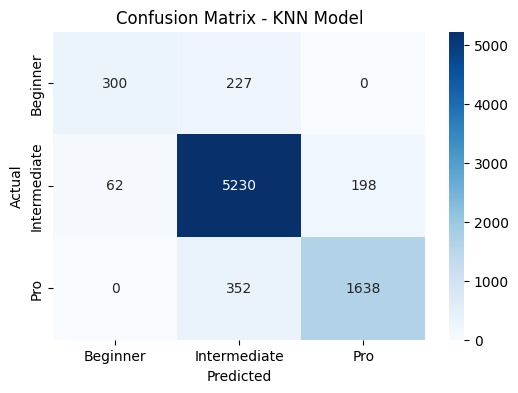

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred = knn_model.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"KNN - Accuracy: {accuracy} \n")
print(report)

accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred, output_dict=True)

model_accuracies['KNN'] = accuracy
model_reports['KNN'] = report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Model")
plt.show()

# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/knn_results.csv",index=False)

Naive Bayes - Accuracy: 0.9812663919070813

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       527
           1       0.97      1.00      0.99      5490
           2       1.00      1.00      1.00      1990

    accuracy                           0.98      8007
   macro avg       0.99      0.91      0.94      8007
weighted avg       0.98      0.98      0.98      8007



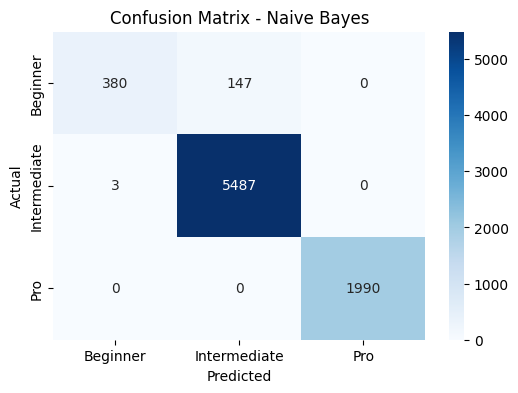

In [25]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred = nb_model.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"Naive Bayes - Accuracy: {accuracy}\n")
print(report)

accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred, output_dict=True)

model_accuracies['Naive Bayes'] = accuracy
model_reports['Naive Bayes'] = report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/nb_results.csv",index=False)


SVM - Accuracy: 0.9660297239915074

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       527
           1       0.97      0.99      0.98      5490
           2       1.00      1.00      1.00      1990

    accuracy                           0.97      8007
   macro avg       0.93      0.87      0.89      8007
weighted avg       0.96      0.97      0.96      8007



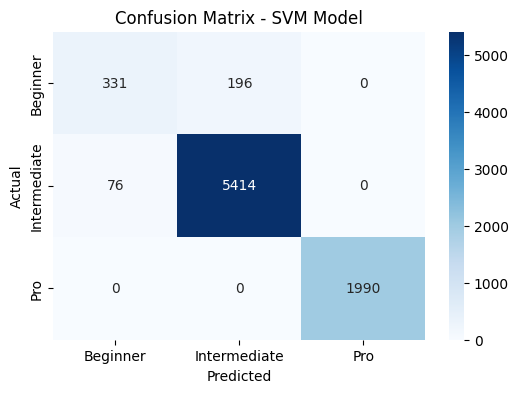

In [26]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_clf, y_train_clf)

# Predict on the test set
y_pred = svm_model.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred)

print(f"SVM - Accuracy: {accuracy}\n")
print(report)

accuracy = accuracy_score(y_test_clf, y_pred)
report = classification_report(y_test_clf, y_pred, output_dict=True)

model_accuracies['SVM'] = accuracy
model_reports['SVM'] = report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_clf, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/svm_results.csv",index=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8449 - loss: 0.3910 - val_accuracy: 0.9600 - val_loss: 0.0933
Epoch 2/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.0807 - val_accuracy: 0.9763 - val_loss: 0.0584
Epoch 3/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0494 - val_accuracy: 0.9845 - val_loss: 0.0387
Epoch 4/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9874 - loss: 0.0341 - val_accuracy: 0.9894 - val_loss: 0.0264
Epoch 5/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0264 - val_accuracy: 0.9867 - val_loss: 0.0308
Epoch 6/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0259 - val_accuracy: 0.9863 - val_loss: 0.0306
Epoch 7/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9953 - val_loss: 0.0158
Epoch 8/50
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0177 - val_accuracy: 0.

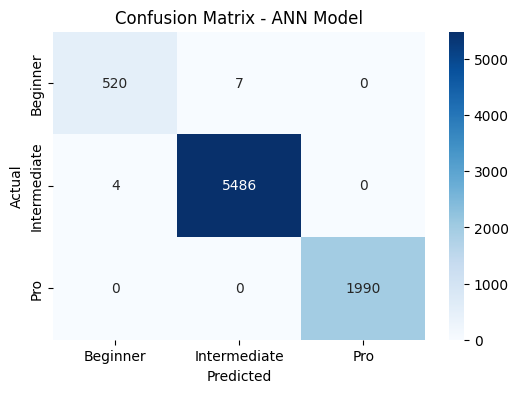

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [1] Define the ANN architecture for multi-class classification
ann_model = Sequential([
    Dense(64, input_dim=X_train_ann.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 output units for 3 classes
])

# [2] Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# [3] Train the model
ann_model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# [4] Evaluate the model on the test set
loss, accuracy = ann_model.evaluate(X_test_ann, y_test_ann)
print(f"ANN - Accuracy: {accuracy:.4f}")

# [5] Make predictions
y_pred_probs = ann_model.predict(X_test_ann)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_ann, axis=1)

# [6] Generate classification report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# [7] Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ANN Model")
plt.show()

# [8] Save results to CSV
results_df = pd.DataFrame({
    "true_label": y_true_classes,
    "prediction": y_pred_classes
})
results_df.to_csv("Data/Result/ANN_results.csv",index=False)


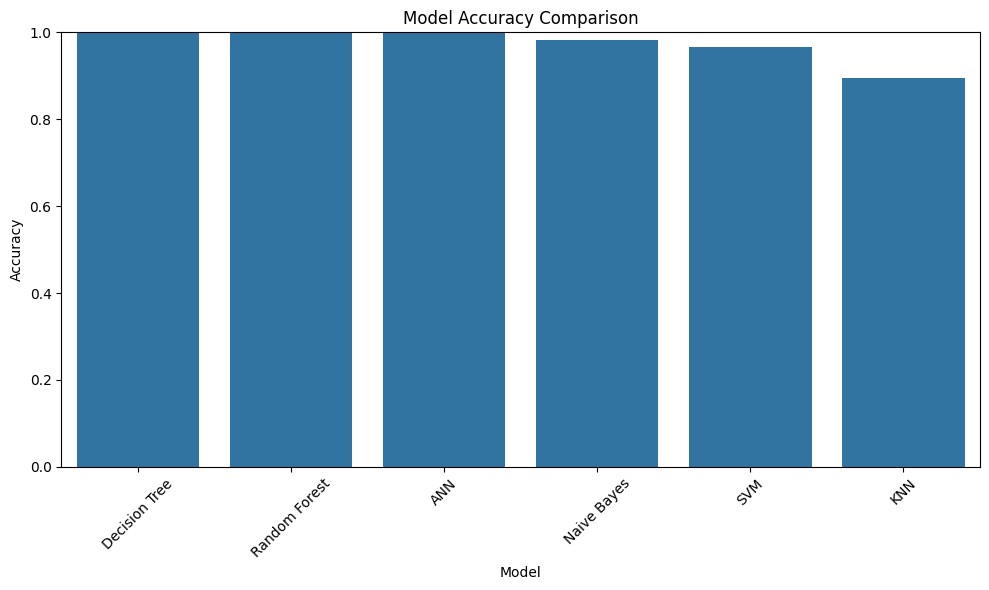

Best model(s): Decision Tree, Random Forest with accuracy: 0.9998751092793805
Worst model(s): KNN with accuracy: 0.8952166854002748

Model Ranking (High to Low):
1. Decision Tree: 0.9998751092793805
2. Random Forest: 0.9998751092793805
3. ANN: 0.9986
4. Naive Bayes: 0.9812663919070813
5. SVM: 0.9660297239915074
6. KNN: 0.8952166854002748


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded model accuracies
model_accuracies = {
    "Decision Tree": 0.9998751092793805 ,
    "Random Forest": 0.9998751092793805,
    "KNN":0.8952166854002748,
    "Naive Bayes": 0.9812663919070813,
    "SVM": 0.9660297239915074,
    "ANN": 0.9986
}

# Sort models by accuracy (descending)
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names = [item[0] for item in sorted_models]
accuracies = [item[1] for item in sorted_models]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Identify best and worst models (handle ties)
max_acc = max(accuracies)
min_acc = min(accuracies)

best_models = [name for name, acc in sorted_models if acc == max_acc]
worst_models = [name for name, acc in sorted_models if acc == min_acc]

print(f"Best model(s): {', '.join(best_models)} with accuracy: {max_acc:}")
print(f"Worst model(s): {', '.join(worst_models)} with accuracy: {min_acc:}")

# Print full ranking
print("\nModel Ranking (High to Low):")
for i, (name, acc) in enumerate(sorted_models, 1):
    print(f"{i}. {name}: {acc:}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>